In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2022-07-24 10:42:09.955098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-24 10:42:09.955123: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 18s 0us/step


In [7]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [8]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [12]:
def plot_sample(index, arr):
    plt.figure(figsize=(10,1))
    plt.imshow(arr[index])

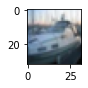

In [14]:
plot_sample(2, X_test)

In [15]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [17]:
def get_class(index, arr):
    return classes[arr[index][0]]

In [18]:
get_class(2, y_test)

'ship'

In [28]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [29]:
y_train_categorical = keras.utils.to_categorical(
    y_train,
    num_classes=10,
    dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test,
    num_classes=10,
    dtype='float32'
)

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10


2022-07-24 11:13:23.839739: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 59s 38ms/step - loss: 1.8114 - accuracy: 0.3533
Epoch 2/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.6230 - accuracy: 0.4284
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.5399 - accuracy: 0.4564
Epoch 4/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4793 - accuracy: 0.4788
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4299 - accuracy: 0.4967
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3878 - accuracy: 0.5122
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3503 - accuracy: 0.5249
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3166 - accuracy: 0.5362
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2817 - accuracy: 0.5516
Epoch 10/10
1563/1563 [==============================] - 73s 46ms/step - lo

In [40]:
get_class(1, y_test)

'ship'

In [42]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 [==============================] - 4s 13ms/step


9

In [44]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 5s 15ms/step - loss: 1.3670 - accuracy: 0.5132


[1.3669915199279785, 0.5131999850273132]